# ****Proyek UAS Data Engineering****

## Judul : Analisis Hubungan antara Timbulan Sampah, Desa yang Tercemar, dan Jumlah Penduduk di Indonesia Tahun 2024

### Deskripsi Singkat : 


### Tujuan Proyek:


### **Ambil data timbulan sampah**

In [426]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

# Endpoint dan payload
url = "https://sipsn.menlhk.go.id/sipsn/public/home/ajax_list"
payload = {
    "jenis": "timbulan",
    "tahun": "2024",
    "id_propinsi": "ALL",
    "id_district": "",
    "id_das": "0"
}

try:
    # Request ke server
    with requests.Session() as session:
        response = session.post(url, data=payload, timeout=10)
        response.raise_for_status()  # Men-trigger exception jika status bukan 200
        soup = BeautifulSoup(response.content, "html.parser")

        try:
            data_json = json.loads(soup.text)
            data_list = data_json.get('data', [])
            print(data_list)
        except json.JSONDecodeError:
            print("Gagal mem-parsing JSON. Cek format respon.")
        except KeyError:
            print("Kunci 'data' tidak ditemukan dalam respon JSON.")

except requests.exceptions.RequestException as e:
    print(f"Terjadi kesalahan saat mengirim request: {e}")


[{'tahun': '2024', 'nama_propinsi': 'Aceh', 'nama_dati2': 'Kab. Aceh Selatan', 'timbulan_harian': '94.59', 'timbulan_tahunan': '34,527.10'}, {'tahun': '2024', 'nama_propinsi': 'Aceh', 'nama_dati2': 'Kab. Aceh Tenggara', 'timbulan_harian': '149.68', 'timbulan_tahunan': '54,634.66'}, {'tahun': '2024', 'nama_propinsi': 'Aceh', 'nama_dati2': 'Kab. Aceh Timur', 'timbulan_harian': '181.89', 'timbulan_tahunan': '66,389.56'}, {'tahun': '2024', 'nama_propinsi': 'Aceh', 'nama_dati2': 'Kab. Aceh Tengah', 'timbulan_harian': '113.08', 'timbulan_tahunan': '41,273.39'}, {'tahun': '2024', 'nama_propinsi': 'Aceh', 'nama_dati2': 'Kab. Aceh Barat', 'timbulan_harian': '102.55', 'timbulan_tahunan': '37,432.21'}, {'tahun': '2024', 'nama_propinsi': 'Aceh', 'nama_dati2': 'Kab. Aceh Besar', 'timbulan_harian': '149.14', 'timbulan_tahunan': '54,434.93'}, {'tahun': '2024', 'nama_propinsi': 'Aceh', 'nama_dati2': 'Kab. Pidie', 'timbulan_harian': '179.23', 'timbulan_tahunan': '65,420.41'}, {'tahun': '2024', 'nama_pr

In [427]:
#convert menjadi dataframe
timbulan = pd.DataFrame(data_list)

In [428]:
#mengganti koma menjadi titik
timbulan['timbulan_harian'] = timbulan['timbulan_harian'].str.replace(',', '').astype(float)
timbulan['timbulan_tahunan'] = timbulan['timbulan_tahunan'].str.replace(',', '').astype(float)

In [429]:
#menampilkan tabel
print(timbulan)

    tahun     nama_propinsi           nama_dati2  timbulan_harian  \
0    2024              Aceh    Kab. Aceh Selatan            94.59   
1    2024              Aceh   Kab. Aceh Tenggara           149.68   
2    2024              Aceh      Kab. Aceh Timur           181.89   
3    2024              Aceh     Kab. Aceh Tengah           113.08   
4    2024              Aceh      Kab. Aceh Barat           102.55   
..    ...               ...                  ...              ...   
312  2024      Papua Tengah         Kab. Dogiyai            47.13   
313  2024  Papua Pegunungan      Kab. Jayawijaya           113.00   
314  2024  Papua Barat Daya          Kab. Sorong            51.99   
315  2024  Papua Barat Daya  Kab. Sorong Selatan            21.20   
316  2024  Papua Barat Daya      Kab. Raja Ampat            27.40   

     timbulan_tahunan  
0            34527.10  
1            54634.66  
2            66389.56  
3            41273.39  
4            37432.21  
..                ...  
312

In [430]:
#mengganti nama header tabel
timbulan.rename(columns={
    "tahun": "Tahun",
    "nama_propinsi": "Provinsi",
    "nama_dati2": "Kabupaten/Kota",
    "timbulan_harian": "Timbulan Sampah Harian (ton)",
    "timbulan_tahunan": "Timbulan Sampah Tahunan (ton)"
}, inplace=True)


In [431]:
#menghapus column Kabupaten/Kota
timbulan = timbulan.drop(columns=['Kabupaten/Kota'])

In [432]:
timbulan = timbulan.drop(columns=['Timbulan Sampah Harian (ton)'])

In [433]:
#mengelompokkan provinsi dan menjumlahkan data timbulan
dataTimbulan = timbulan.groupby(['Provinsi', 'Tahun'], as_index=False)[
    ['Timbulan Sampah Tahunan (ton)']
].sum()

In [434]:
dataTimbulan.sort_values(by=['Tahun', 'Provinsi'], inplace=True)

In [435]:
dataTimbulan.reset_index(drop=True, inplace=True)
dataTimbulan.index += 1

In [436]:
#cek apakah ada yang NULL
dataTimbulan.isnull().sum()

Provinsi                         0
Tahun                            0
Timbulan Sampah Tahunan (ton)    0
dtype: int64

In [437]:
# "Hapus baris yang memiliki kurang dari 2 nilai non-NaN, sehingga hanya baris dengan minimal 2 nilai non-NaN yang tetap ada.
hapusbaris=dataTimbulan.dropna(axis="index",thresh=2, inplace=False)
hapusbaris.shape

(38, 3)

In [438]:
# memeriksa isi yang ada pada kolom Provinsi pada dataTimbulan
dataTimbulan["Provinsi"].unique()

array(['Aceh', 'Bali', 'Banten', 'Bengkulu', 'DKI Jakarta',
       'Daerah Istimewa Yogyakarta', 'Gorontalo', 'Jambi', 'Jawa Barat',
       'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat',
       'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur',
       'Kalimantan Utara', 'Kepulauan Bangka Belitung', 'Kepulauan Riau',
       'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Papua Barat Daya',
       'Papua Pegunungan', 'Papua Selatan', 'Papua Tengah', 'Riau',
       'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat',
       'Sumatera Selatan', 'Sumatera Utara'], dtype=object)

In [439]:
dataTimbulan

,Provinsi,Tahun,Timbulan Sampah Tahunan (ton)
1,Aceh,2024,940267.23
2,Bali,2024,1167451.76
3,Banten,2024,2159859.19
4,Bengkulu,2024,245220.59
5,DKI Jakarta,2024,3171247.60
6,Daerah Istimewa Yogyakarta,2024,702140.01
7,Gorontalo,2024,72827.63
8,Jambi,2024,233450.87
9,Jawa Barat,2024,6153346.94
10,Jawa Tengah,2024,3530896.20


## ****Data Pencemaran Desa****

In [440]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

def init_driver():
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    return webdriver.Chrome(options=options)

def scrape_bps_table(url, wait_time=10):
    print(f"Mengakses URL: {url}")
    driver = init_driver()
    driver.get(url)

    try:
        WebDriverWait(driver, wait_time).until(
            EC.presence_of_element_located((By.TAG_NAME, "table"))
        )
        time.sleep(3)
        html_content = driver.page_source
    except Exception as e:
        print(f"Terjadi kesalahan saat memuat halaman: {e}")
        driver.quit()
        return None

    driver.quit()
    return html_content

def extract_table_from_html(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    tables = soup.find_all("table")

    if not tables:
        print("Tabel tidak ditemukan dalam halaman HTML.")
        return pd.DataFrame()

    try:
        pencemaran = pd.read_html(str(tables), header=[0, 1])[0]  # Multi-level header
        print(f"Jumlah baris data yang diambil: {len(pencemaran)}")
        return pencemaran
    except Exception as e:
        print(f"Gagal mengubah HTML menjadi DataFrame: {e}")
        return pd.DataFrame()

def get_pencemaran_dataframe():
    url = "https://www.bps.go.id/id/statistics-table/2/OTU5IzI=/banyaknya-desa-kelurahan-menurut-jenis-pencemaran-lingkungan-hidup.html"
    html_content = scrape_bps_table(url)

    if html_content:
        pencemaran = extract_table_from_html(html_content)
        return pencemaran
    else:
        print("Tidak berhasil mengambil HTML.")
        return pd.DataFrame()

if __name__ == "__main__":
    pencemaran = get_pencemaran_dataframe()

    print(pencemaran.head())


Mengakses URL: https://www.bps.go.id/id/statistics-table/2/OTU5IzI=/banyaknya-desa-kelurahan-menurut-jenis-pencemaran-lingkungan-hidup.html
Jumlah baris data yang diambil: 41
      38 Provinsi  \
      38 Provinsi   
0     38 Provinsi   
1     38 Provinsi   
2            ACEH   
3  SUMATERA UTARA   
4  SUMATERA BARAT   

                                                         Unnamed: 1_level_0  \
  Banyaknya Desa/Kelurahan Menurut Jenis Pencemaran Lingkungan Hidup (Desa)   
0                                     Pencemaran Air                          
1                                               2024                          
2                                                308                          
3                                                800                          
4                                                238                          

                                                         Unnamed: 2_level_0  \
  Banyaknya Desa/Kelurahan Menurut Jenis Pen

C:\Users\User\AppData\Local\Temp\ipykernel_15192\31264230.py:45: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pencemaran = pd.read_html(str(tables), header=[0, 1])[0]  # Multi-level header


In [441]:
pencemaran

,38 Provinsi,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0
,38 Provinsi,Banyaknya Desa/Kelurahan Menurut Jenis Pencemaran Lingkungan Hidup (Desa),Banyaknya Desa/Kelurahan Menurut Jenis Pencemaran Lingkungan Hidup (Desa),Banyaknya Desa/Kelurahan Menurut Jenis Pencemaran Lingkungan Hidup (Desa),Banyaknya Desa/Kelurahan Menurut Jenis Pencemaran Lingkungan Hidup (Desa)
0,38 Provinsi,Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
1,38 Provinsi,2024,2024,2024,2024
2,ACEH,308,14,168,6.088
3,SUMATERA UTARA,800,20,229,5.184
4,SUMATERA BARAT,238,27,158,950
5,RIAU,248,6,123,1.535
6,JAMBI,466,27,55,1.082
7,SUMATERA SELATAN,405,34,229,2.750
8,BENGKULU,219,4,74,1.255


In [442]:
pencemaran = pencemaran.drop(index=[0, 1]).reset_index(drop=True)

# Atur ulang nama kolom
pencemaran.columns = ["Provinsi", "Pencemaran Air", "Pencemaran Tanah", "Pencemaran Udara", "Tidak Ada Pencemaran"]

# Cek hasil
print(pencemaran.head())

         Provinsi Pencemaran Air Pencemaran Tanah Pencemaran Udara  \
0            ACEH            308               14              168   
1  SUMATERA UTARA            800               20              229   
2  SUMATERA BARAT            238               27              158   
3            RIAU            248                6              123   
4           JAMBI            466               27               55   

  Tidak Ada Pencemaran  
0                6.088  
1                5.184  
2                  950  
3                1.535  
4                1.082  


In [443]:
pencemaran

,Provinsi,Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
0,ACEH,308,14,168,6.088
1,SUMATERA UTARA,800,20,229,5.184
2,SUMATERA BARAT,238,27,158,950
3,RIAU,248,6,123,1.535
4,JAMBI,466,27,55,1.082
5,SUMATERA SELATAN,405,34,229,2.750
6,BENGKULU,219,4,74,1.255
7,LAMPUNG,286,15,174,2.268
8,KEP. BANGKA BELITUNG,105,10,35,268
9,KEP. RIAU,23,0,23,386


In [444]:
pencemaran["Provinsi"] = pencemaran["Provinsi"].str.title()

In [445]:
pencemaran

,Provinsi,Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
0,Aceh,308,14,168,6.088
1,Sumatera Utara,800,20,229,5.184
2,Sumatera Barat,238,27,158,950
3,Riau,248,6,123,1.535
4,Jambi,466,27,55,1.082
5,Sumatera Selatan,405,34,229,2.750
6,Bengkulu,219,4,74,1.255
7,Lampung,286,15,174,2.268
8,Kep. Bangka Belitung,105,10,35,268
9,Kep. Riau,23,0,23,386


In [446]:
pencemaran.isnull().sum()

Provinsi                0
Pencemaran Air          0
Pencemaran Tanah        0
Pencemaran Udara        0
Tidak Ada Pencemaran    0
dtype: int64

# ****Penduduk****

In [447]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

def init_driver():
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    return webdriver.Chrome(options=options)

def scrape_bps_table(url, wait_time=10):
    print(f"Mengakses URL: {url}")
    driver = init_driver()
    driver.get(url)

    try:
        WebDriverWait(driver, wait_time).until(
            EC.presence_of_element_located((By.TAG_NAME, "table"))
        )
        time.sleep(3)
        html_content = driver.page_source
    except Exception as e:
        print(f"Terjadi kesalahan saat memuat halaman: {e}")
        driver.quit()
        return None

    driver.quit()
    return html_content

def extract_table_from_html(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    tables = soup.find_all("table")

    if not tables:
        print("Tabel tidak ditemukan dalam halaman HTML.")
        return pd.DataFrame()

    try:
        penduduk = pd.read_html(str(tables), header=[0, 1])[0]  # Multi-level header
        print(f"Jumlah baris data yang diambil: {len(penduduk)}")
        return penduduk
    except Exception as e:
        print(f"Gagal mengubah HTML menjadi DataFrame: {e}")
        return pd.DataFrame()

def get_penduduk_dataframe():
    url = "https://sulut.bps.go.id/id/statistics-table/2/OTU4IzI=/jumlah-penduduk-menurut-provinsi-di-indonesia.html"
    html_content = scrape_bps_table(url)

    if html_content:
        penduduk = extract_table_from_html(html_content)
        return penduduk
    else:
        print("Tidak berhasil mengambil HTML.")
        return pd.DataFrame()

if __name__ == "__main__":
    penduduk = get_penduduk_dataframe()

    print(penduduk.head())


Mengakses URL: https://sulut.bps.go.id/id/statistics-table/2/OTU4IzI=/jumlah-penduduk-menurut-provinsi-di-indonesia.html
Jumlah baris data yang diambil: 36
   Provinsi di Indonesia  \
   Provinsi di Indonesia   
0  Provinsi di Indonesia   
1                   Aceh   
2         Sumatera Utara   
3         Sumatera Barat   
4                   Riau   

                                         Unnamed: 1_level_0  
  Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)  
0                                               2024         
1                                            5.554,8         
2                                           15.588,5         
3                                            5.836,2         
4                                            6.728,1         


C:\Users\User\AppData\Local\Temp\ipykernel_15192\3497311433.py:45: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  penduduk = pd.read_html(str(tables), header=[0, 1])[0]  # Multi-level header


In [448]:
penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   (Provinsi di Indonesia, Provinsi di Indonesia)                                   36 non-null     object
 1   (Unnamed: 1_level_0, Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa))  36 non-null     object
dtypes: object(2)
memory usage: 708.0+ bytes


In [449]:
penduduk.isnull().sum()

Provinsi di Indonesia  Provinsi di Indonesia                                        0
Unnamed: 1_level_0     Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)    0
dtype: int64

In [450]:
penduduk.head()

,Provinsi di Indonesia,Unnamed: 1_level_0
,Provinsi di Indonesia,Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)
0,Provinsi di Indonesia,2024
1,Aceh,"5.554,8"
2,Sumatera Utara,"15.588,5"
3,Sumatera Barat,"5.836,2"
4,Riau,"6.728,1"


In [451]:
penduduk = penduduk.drop(index=[0]).reset_index(drop=True)

# Atur ulang nama kolom
penduduk.columns = ["Provinsi di Indonesia","Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)"]

# Cek hasil
print(penduduk.head())


  Provinsi di Indonesia  \
0                  Aceh   
1        Sumatera Utara   
2        Sumatera Barat   
3                  Riau   
4             Kep. Riau   

  Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)  
0                                            5.554,8         
1                                           15.588,5         
2                                            5.836,2         
3                                            6.728,1         
4                                            2.183,3         


In [452]:
penduduk

,Provinsi di Indonesia,Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)
0,Aceh,"5.554,8"
1,Sumatera Utara,"15.588,5"
2,Sumatera Barat,"5.836,2"
3,Riau,"6.728,1"
4,Kep. Riau,"2.183,3"
5,Jambi,"3.724,3"
6,Sumatera Selatan,"8.837,3"
7,Kep. Bangka Belitung,"1.531,5"
8,Bengkulu,"2.112,2"
9,Lampung,"9.419,6"


In [453]:
penduduk.reset_index(drop=True, inplace=True)
penduduk.index += 1

In [454]:
penduduk = penduduk.rename(columns={'Provinsi di Indonesia': 'Provinsi'})

In [455]:
penduduk.isnull().sum()

Provinsi                                                     0
Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)    0
dtype: int64

In [456]:
penduduk.head()

,Provinsi,Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)
1,Aceh,"5.554,8"
2,Sumatera Utara,"15.588,5"
3,Sumatera Barat,"5.836,2"
4,Riau,"6.728,1"
5,Kep. Riau,"2.183,3"


# **PIPELINE**

In [457]:
# Baca Data untuk Pipeline
import pandas as pd
import logging

logging.basicConfig(level=logging.ERROR)

def read_data(df_path):
    try:
        data = pd.read_csv(df_path)
        print(f"Berhasil membaca: {df_path}")
        return data
    except Exception as e:
        print(f"Gagal membaca: {df_path} — {e}")
        return pd.DataFrame()

def pipeline_baca_data(dataTimbulan, pencemaran, penduduk):
    try:
        dataTimbulan = read_data(dataTimbulan)
        pencemaran = read_data(pencemaran)
        penduduk = read_data(penduduk)
    except Exception as e:
        logging.error(f'Gagal Membaca Path: {e}')
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

    return dataTimbulan, pencemaran, penduduk


In [458]:
df_merge1=pd.merge(dataTimbulan,pencemaran,on="Provinsi")
merge=pd.merge(penduduk,df_merge1,on="Provinsi")
merge.head()

,Provinsi,Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa),Tahun,Timbulan Sampah Tahunan (ton),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
0,Aceh,"5.554,8",2024,940267.23,308,14,168,6.088
1,Sumatera Utara,"15.588,5",2024,1093646.76,800,20,229,5.184
2,Sumatera Barat,"5.836,2",2024,798430.65,238,27,158,950
3,Riau,"6.728,1",2024,752982.80,248,6,123,1.535
4,Jambi,"3.724,3",2024,233450.87,466,27,55,1.082


In [459]:
merge.reset_index(drop=True, inplace=True)
merge.index += 1

In [460]:
merge

,Provinsi,Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa),Tahun,Timbulan Sampah Tahunan (ton),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
1,Aceh,"5.554,8",2024,940267.23,308,14,168,6.088
2,Sumatera Utara,"15.588,5",2024,1093646.76,800,20,229,5.184
3,Sumatera Barat,"5.836,2",2024,798430.65,238,27,158,950
4,Riau,"6.728,1",2024,752982.80,248,6,123,1.535
5,Jambi,"3.724,3",2024,233450.87,466,27,55,1.082
6,Sumatera Selatan,"8.837,3",2024,642748.64,405,34,229,2.750
7,Bengkulu,"2.112,2",2024,245220.59,219,4,74,1.255
8,Lampung,"9.419,6",2024,720583.30,286,15,174,2.268
9,Jawa Barat,"50.345,2",2024,6153346.94,1.354,65,461,4.413
10,Banten,"12.431,4",2024,2159859.19,319,36,182,1.145


In [461]:
merge.to_csv("merge.csv", index=False)

In [462]:
merge

,Provinsi,Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa),Tahun,Timbulan Sampah Tahunan (ton),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
1,Aceh,"5.554,8",2024,940267.23,308,14,168,6.088
2,Sumatera Utara,"15.588,5",2024,1093646.76,800,20,229,5.184
3,Sumatera Barat,"5.836,2",2024,798430.65,238,27,158,950
4,Riau,"6.728,1",2024,752982.80,248,6,123,1.535
5,Jambi,"3.724,3",2024,233450.87,466,27,55,1.082
6,Sumatera Selatan,"8.837,3",2024,642748.64,405,34,229,2.750
7,Bengkulu,"2.112,2",2024,245220.59,219,4,74,1.255
8,Lampung,"9.419,6",2024,720583.30,286,15,174,2.268
9,Jawa Barat,"50.345,2",2024,6153346.94,1.354,65,461,4.413
10,Banten,"12.431,4",2024,2159859.19,319,36,182,1.145


In [463]:
merge.rename(columns={
    "Jumlah Penduduk Menurut Provinsi di Indonesia (Ribu Jiwa)": "Jumlah Penduduk 2024"
}, inplace=True)

In [464]:
merge.drop(columns=['Tahun'], inplace=True)

In [465]:
merge

,Provinsi,Jumlah Penduduk 2024,Timbulan Sampah Tahunan (ton),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
1,Aceh,"5.554,8",940267.23,308,14,168,6.088
2,Sumatera Utara,"15.588,5",1093646.76,800,20,229,5.184
3,Sumatera Barat,"5.836,2",798430.65,238,27,158,950
4,Riau,"6.728,1",752982.80,248,6,123,1.535
5,Jambi,"3.724,3",233450.87,466,27,55,1.082
6,Sumatera Selatan,"8.837,3",642748.64,405,34,229,2.750
7,Bengkulu,"2.112,2",245220.59,219,4,74,1.255
8,Lampung,"9.419,6",720583.30,286,15,174,2.268
9,Jawa Barat,"50.345,2",6153346.94,1.354,65,461,4.413
10,Banten,"12.431,4",2159859.19,319,36,182,1.145


In [466]:
# Contoh pengolahan kolom jumlah penduduk
merge['Jumlah Penduduk 2024'] = merge['Jumlah Penduduk 2024'].str.replace('.', '', regex=False)  # Hilangkan titik (ribuan)
merge['Jumlah Penduduk 2024'] = merge['Jumlah Penduduk 2024'].str.replace(',', '.', regex=False)  # Ganti koma jadi titik
merge['Jumlah Penduduk 2024'] = merge['Jumlah Penduduk 2024'].astype(float)


In [467]:
merge

,Provinsi,Jumlah Penduduk 2024,Timbulan Sampah Tahunan (ton),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
1,Aceh,5554.8,940267.23,308,14,168,6.088
2,Sumatera Utara,15588.5,1093646.76,800,20,229,5.184
3,Sumatera Barat,5836.2,798430.65,238,27,158,950
4,Riau,6728.1,752982.80,248,6,123,1.535
5,Jambi,3724.3,233450.87,466,27,55,1.082
6,Sumatera Selatan,8837.3,642748.64,405,34,229,2.750
7,Bengkulu,2112.2,245220.59,219,4,74,1.255
8,Lampung,9419.6,720583.30,286,15,174,2.268
9,Jawa Barat,50345.2,6153346.94,1.354,65,461,4.413
10,Banten,12431.4,2159859.19,319,36,182,1.145


In [468]:
kolom_numerik = ['Pencemaran Air', 'Pencemaran Tanah', 'Pencemaran Udara']

for kolom in kolom_numerik:
    merge[kolom] = merge[kolom].astype(str).str.replace('.', '', regex=False)
    merge[kolom] = merge[kolom].str.replace(',', '.', regex=False).astype(float)


In [469]:
merge

,Provinsi,Jumlah Penduduk 2024,Timbulan Sampah Tahunan (ton),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
1,Aceh,5554.8,940267.23,308.0,14.0,168.0,6.088
2,Sumatera Utara,15588.5,1093646.76,800.0,20.0,229.0,5.184
3,Sumatera Barat,5836.2,798430.65,238.0,27.0,158.0,950
4,Riau,6728.1,752982.80,248.0,6.0,123.0,1.535
5,Jambi,3724.3,233450.87,466.0,27.0,55.0,1.082
6,Sumatera Selatan,8837.3,642748.64,405.0,34.0,229.0,2.750
7,Bengkulu,2112.2,245220.59,219.0,4.0,74.0,1.255
8,Lampung,9419.6,720583.30,286.0,15.0,174.0,2.268
9,Jawa Barat,50345.2,6153346.94,1354.0,65.0,461.0,4.413
10,Banten,12431.4,2159859.19,319.0,36.0,182.0,1.145


In [470]:
hapusbaris=merge.dropna(axis="index",thresh=2, inplace=False)
hapusbaris.shape

(30, 7)

In [471]:
merge.isnull().sum()

Provinsi                         0
Jumlah Penduduk 2024             0
Timbulan Sampah Tahunan (ton)    0
Pencemaran Air                   0
Pencemaran Tanah                 0
Pencemaran Udara                 0
Tidak Ada Pencemaran             0
dtype: int64

In [472]:
merge

,Provinsi,Jumlah Penduduk 2024,Timbulan Sampah Tahunan (ton),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
1,Aceh,5554.8,940267.23,308.0,14.0,168.0,6.088
2,Sumatera Utara,15588.5,1093646.76,800.0,20.0,229.0,5.184
3,Sumatera Barat,5836.2,798430.65,238.0,27.0,158.0,950
4,Riau,6728.1,752982.80,248.0,6.0,123.0,1.535
5,Jambi,3724.3,233450.87,466.0,27.0,55.0,1.082
6,Sumatera Selatan,8837.3,642748.64,405.0,34.0,229.0,2.750
7,Bengkulu,2112.2,245220.59,219.0,4.0,74.0,1.255
8,Lampung,9419.6,720583.30,286.0,15.0,174.0,2.268
9,Jawa Barat,50345.2,6153346.94,1354.0,65.0,461.0,4.413
10,Banten,12431.4,2159859.19,319.0,36.0,182.0,1.145


In [473]:
# reset index agar urut dari nomor 1
merge.reset_index(drop=True, inplace=True)
merge.index += 1

In [474]:
merge

,Provinsi,Jumlah Penduduk 2024,Timbulan Sampah Tahunan (ton),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran
1,Aceh,5554.8,940267.23,308.0,14.0,168.0,6.088
2,Sumatera Utara,15588.5,1093646.76,800.0,20.0,229.0,5.184
3,Sumatera Barat,5836.2,798430.65,238.0,27.0,158.0,950
4,Riau,6728.1,752982.80,248.0,6.0,123.0,1.535
5,Jambi,3724.3,233450.87,466.0,27.0,55.0,1.082
6,Sumatera Selatan,8837.3,642748.64,405.0,34.0,229.0,2.750
7,Bengkulu,2112.2,245220.59,219.0,4.0,74.0,1.255
8,Lampung,9419.6,720583.30,286.0,15.0,174.0,2.268
9,Jawa Barat,50345.2,6153346.94,1354.0,65.0,461.0,4.413
10,Banten,12431.4,2159859.19,319.0,36.0,182.0,1.145


In [475]:
merge.to_csv("gabung.csv")

# **MENGOLAH DATA UNTUK ANALISIS**

In [476]:
import pandas as pd
from scipy.stats import pearsonr

# 1. Baca file CSV
jadi = pd.read_csv("gabung.csv")
jadi.columns = jadi.columns.str.strip()  # hilangkan spasi berlebih pada nama kolom

# 2. Hitung Sampah per Kapita (kg/orang/tahun)
jadi['Sampah_per_Kapita_kg'] = jadi['Timbulan Sampah Tahunan (ton)'] * 1000 / (jadi['Jumlah Penduduk 2024'])

# 3. Hitung Total Pencemaran Desa (jumlah desa tercemar)
jadi['Total_Pencemaran_Desa'] = jadi['Pencemaran Air'] + jadi['Pencemaran Tanah'] + jadi['Pencemaran Udara']

# 5. Tambahkan kolom analisis pengelolaan
rata_sampahpk = jadi['Sampah_per_Kapita_kg'].mean()
rata_pencemaran = jadi['Total_Pencemaran_Desa'].mean()

jadi['Analisis_Pengelolaan'] = jadi.apply(
    lambda row: "Baik" if row['Sampah_per_Kapita_kg'] > rata_sampahpk and row['Total_Pencemaran_Desa'] < rata_pencemaran
    else "Buruk" if row['Sampah_per_Kapita_kg'] > rata_sampahpk and row['Total_Pencemaran_Desa'] > rata_pencemaran
    else "Sedang",
    axis=1
)


In [477]:
jadi.rename(columns={
    "Timbulan Sampah Tahunan (ton)": "Timbulan Sampah Tahunan (kg)"
}, inplace=True)

In [478]:
jadi

,Unnamed: 0,Provinsi,Jumlah Penduduk 2024,Timbulan Sampah Tahunan (kg),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran,Sampah_per_Kapita_kg,Total_Pencemaran_Desa,Analisis_Pengelolaan
0,1,Aceh,5554.8,940267.23,308.0,14.0,168.0,6.088,169271.122273,490.0,Baik
1,2,Sumatera Utara,15588.5,1093646.76,800.0,20.0,229.0,5.184,70157.280046,1049.0,Sedang
2,3,Sumatera Barat,5836.2,798430.65,238.0,27.0,158.0,950.000,136806.595045,423.0,Baik
3,4,Riau,6728.1,752982.80,248.0,6.0,123.0,1.535,111916.113019,377.0,Sedang
4,5,Jambi,3724.3,233450.87,466.0,27.0,55.0,1.082,62683.153881,548.0,Sedang
5,6,Sumatera Selatan,8837.3,642748.64,405.0,34.0,229.0,2.750,72731.336494,668.0,Sedang
6,7,Bengkulu,2112.2,245220.59,219.0,4.0,74.0,1.255,116097.239845,297.0,Baik
7,8,Lampung,9419.6,720583.30,286.0,15.0,174.0,2.268,76498.290798,475.0,Sedang
8,9,Jawa Barat,50345.2,6153346.94,1354.0,65.0,461.0,4.413,122223.110445,1880.0,Buruk
9,10,Banten,12431.4,2159859.19,319.0,36.0,182.0,1.145,173742.232572,537.0,Buruk


In [479]:
import pandas as pd

# 2. Fungsi untuk menentukan jenis pencemaran yang paling dominan
def dominant_pollution(row):
    jenis = {
        'Air': row['Pencemaran Air'],
        'Tanah': row['Pencemaran Tanah'],
        'Udara': row['Pencemaran Udara']
    }
    return max(jenis, key=jenis.get)

# 3. Tambahkan kolom 'Dominasi_Pencemaran'
jadi['Dominasi_Pencemaran'] = jadi.apply(dominant_pollution, axis=1)

# 4. Simpan ke file baru
jadi.to_csv("hasil_analisis_pengelolaan_dominan.csv", index=False)

print("✅ File berhasil disimpan dengan kolom 'Dominasi_Pencemaran'")


✅ File berhasil disimpan dengan kolom 'Dominasi_Pencemaran'


In [480]:
jadi

,Unnamed: 0,Provinsi,Jumlah Penduduk 2024,Timbulan Sampah Tahunan (kg),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran,Sampah_per_Kapita_kg,Total_Pencemaran_Desa,Analisis_Pengelolaan,Dominasi_Pencemaran
0,1,Aceh,5554.8,940267.23,308.0,14.0,168.0,6.088,169271.122273,490.0,Baik,Air
1,2,Sumatera Utara,15588.5,1093646.76,800.0,20.0,229.0,5.184,70157.280046,1049.0,Sedang,Air
2,3,Sumatera Barat,5836.2,798430.65,238.0,27.0,158.0,950.000,136806.595045,423.0,Baik,Air
3,4,Riau,6728.1,752982.80,248.0,6.0,123.0,1.535,111916.113019,377.0,Sedang,Air
4,5,Jambi,3724.3,233450.87,466.0,27.0,55.0,1.082,62683.153881,548.0,Sedang,Air
5,6,Sumatera Selatan,8837.3,642748.64,405.0,34.0,229.0,2.750,72731.336494,668.0,Sedang,Air
6,7,Bengkulu,2112.2,245220.59,219.0,4.0,74.0,1.255,116097.239845,297.0,Baik,Air
7,8,Lampung,9419.6,720583.30,286.0,15.0,174.0,2.268,76498.290798,475.0,Sedang,Air
8,9,Jawa Barat,50345.2,6153346.94,1354.0,65.0,461.0,4.413,122223.110445,1880.0,Buruk,Air
9,10,Banten,12431.4,2159859.19,319.0,36.0,182.0,1.145,173742.232572,537.0,Buruk,Air


In [481]:
if 'Unnamed: 0' in jadi.columns:
    jadi = jadi.drop(columns=['Unnamed: 0'])

In [482]:
jadi

,Provinsi,Jumlah Penduduk 2024,Timbulan Sampah Tahunan (kg),Pencemaran Air,Pencemaran Tanah,Pencemaran Udara,Tidak Ada Pencemaran,Sampah_per_Kapita_kg,Total_Pencemaran_Desa,Analisis_Pengelolaan,Dominasi_Pencemaran
0,Aceh,5554.8,940267.23,308.0,14.0,168.0,6.088,169271.122273,490.0,Baik,Air
1,Sumatera Utara,15588.5,1093646.76,800.0,20.0,229.0,5.184,70157.280046,1049.0,Sedang,Air
2,Sumatera Barat,5836.2,798430.65,238.0,27.0,158.0,950.000,136806.595045,423.0,Baik,Air
3,Riau,6728.1,752982.80,248.0,6.0,123.0,1.535,111916.113019,377.0,Sedang,Air
4,Jambi,3724.3,233450.87,466.0,27.0,55.0,1.082,62683.153881,548.0,Sedang,Air
5,Sumatera Selatan,8837.3,642748.64,405.0,34.0,229.0,2.750,72731.336494,668.0,Sedang,Air
6,Bengkulu,2112.2,245220.59,219.0,4.0,74.0,1.255,116097.239845,297.0,Baik,Air
7,Lampung,9419.6,720583.30,286.0,15.0,174.0,2.268,76498.290798,475.0,Sedang,Air
8,Jawa Barat,50345.2,6153346.94,1354.0,65.0,461.0,4.413,122223.110445,1880.0,Buruk,Air
9,Banten,12431.4,2159859.19,319.0,36.0,182.0,1.145,173742.232572,537.0,Buruk,Air


In [484]:
jadi.to_csv("dataFinish.csv")

# **Simpan DB**

In [172]:
pip install pandas sqlalchemy psycopg2-binary


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------------------------- ------------ 0.8/1.2 MB 2.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.2 MB 1.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.2 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [491]:
import pandas as pd
from sqlalchemy import create_engine

# 1. Baca file CSV
df = pd.read_csv("dataFinish.csv")

# 2. Konfigurasi koneksi Aiven (ubah sesuai data akunmu)
user = "avnadmin"
password = "AVNS_chu6L3WwtorglwdgBcB"
host = "pg-346ba9a5-uas12-c352.g.aivencloud.com"
port = "27482"
db = "defaultdb"

# 3. Buat URL koneksi
connection_url = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}?sslmode=require"

# 4. Buat koneksi engine SQLAlchemy
engine = create_engine(connection_url)

# 5. Upload data ke tabel 'data_finish'
df.to_sql("UAS_DATA", con=engine, if_exists="replace", index=False)

print("✅ Data berhasil diunggah ke PostgreSQL Aiven.")


✅ Data berhasil diunggah ke PostgreSQL Aiven.


# **GRAFIK, HEATMAP, DAN SCATTER PLOT**

In [485]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("dataFinish.csv")


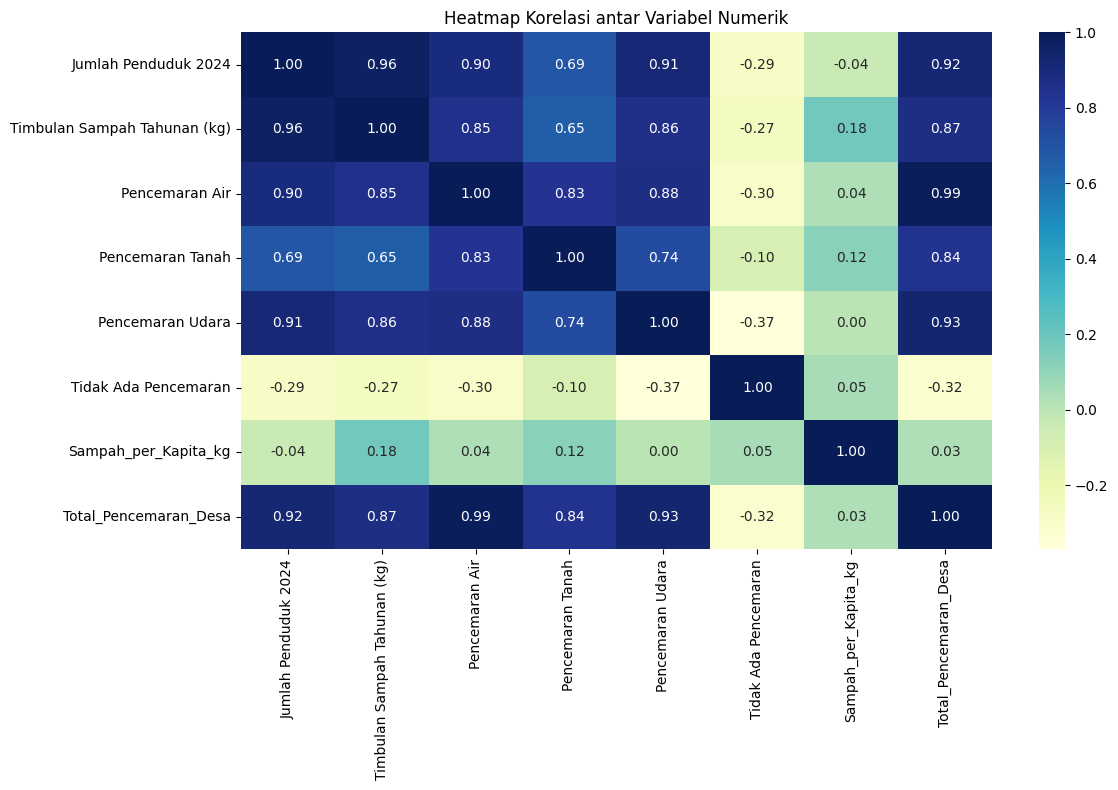

In [487]:
# Pilih kolom numerik
numeric_cols = [
    "Jumlah Penduduk 2024", "Timbulan Sampah Tahunan (kg)", 
    "Pencemaran Air", "Pencemaran Tanah", "Pencemaran Udara", 
    "Tidak Ada Pencemaran", "Sampah_per_Kapita_kg", "Total_Pencemaran_Desa"
]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap Korelasi antar Variabel Numerik")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_15192\2087536615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Timbulan Sampah Tahunan (kg)", y="Provinsi", data=sorted_df, palette="viridis")


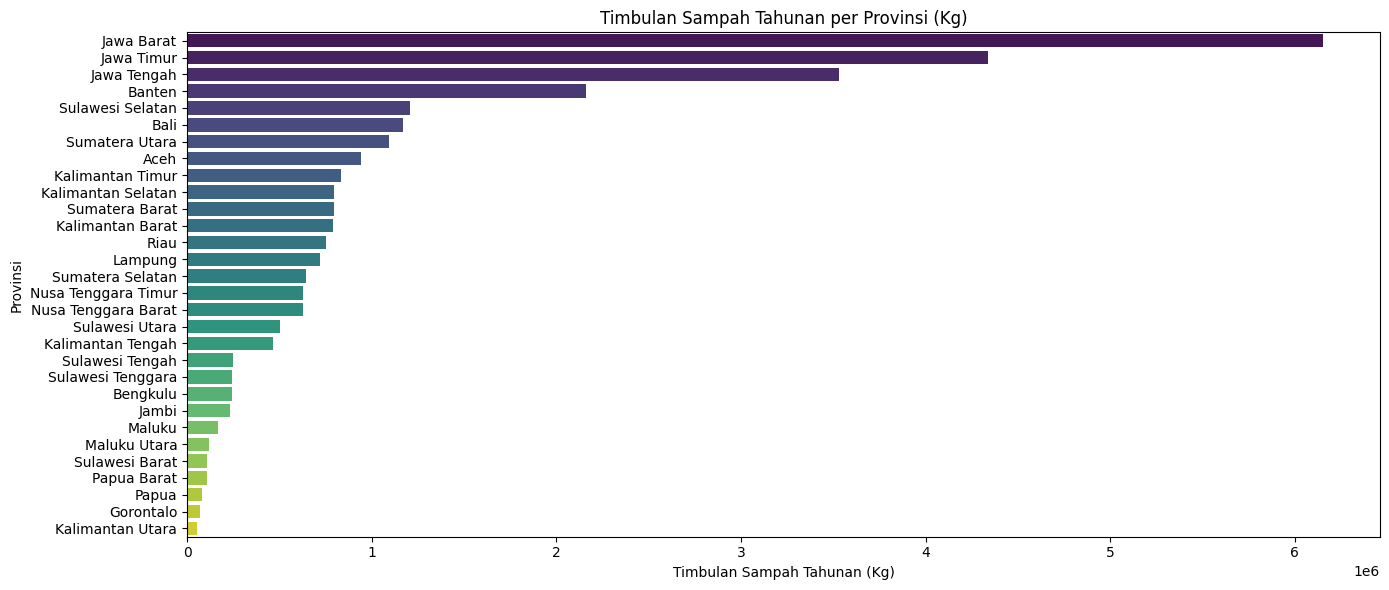

In [488]:
# Urutkan berdasarkan timbulan sampah
sorted_df = df.sort_values("Timbulan Sampah Tahunan (kg)", ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x="Timbulan Sampah Tahunan (kg)", y="Provinsi", data=sorted_df, palette="viridis")
plt.title("Timbulan Sampah Tahunan per Provinsi (Kg)")
plt.xlabel("Timbulan Sampah Tahunan (Kg)")
plt.ylabel("Provinsi")
plt.tight_layout()
plt.show()


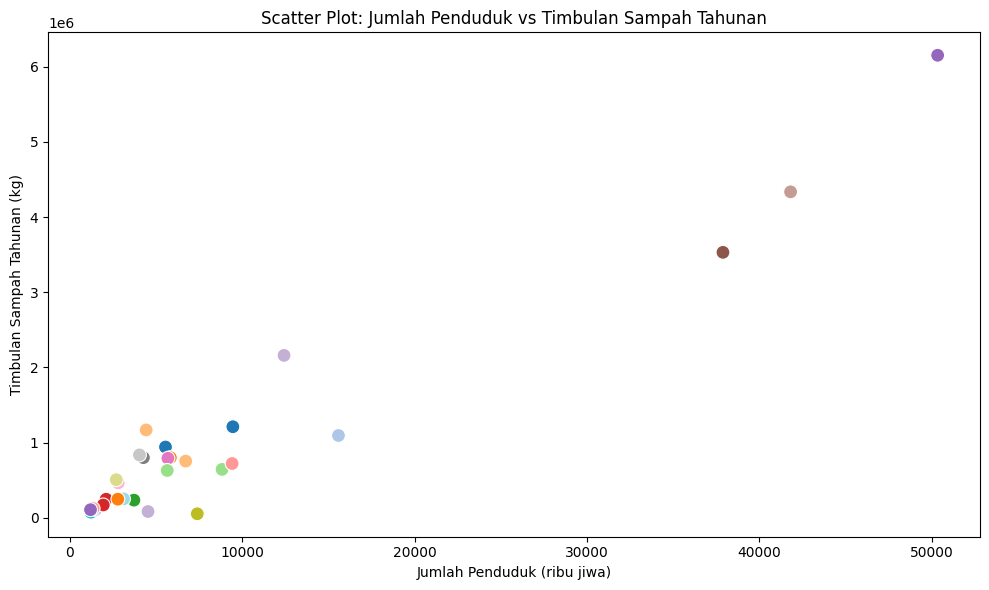

In [489]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Jumlah Penduduk 2024",
    y="Timbulan Sampah Tahunan (kg)",
    data=df,
    hue="Provinsi",
    palette="tab20",
    s=100,
    legend=False
)
plt.title("Scatter Plot: Jumlah Penduduk vs Timbulan Sampah Tahunan")
plt.xlabel("Jumlah Penduduk (ribu jiwa)")
plt.ylabel("Timbulan Sampah Tahunan (kg)")
plt.tight_layout()
plt.show()
